## 1) Bookkeeping and log files in Python

In [1]:
#### AUTHOR C_GOHLKE: LFD

%matplotlib inline
%reload_ext Cython

import os
import sys
import math
import datetime
import multiprocessing
import notebook
from distutils import ccompiler

print('Python', sys.version, end='\n\n')

for item in ('IPython.__version__', 
             'notebook.__version__',
             'numpy.__version__',
             'scipy.__version__',
             'matplotlib.__version__',
             'numba.__version__',
             'Cython.__version__', 
             'dask.__version__',
             'tifffile.__version__',
            ):
    module, version = item.split('.')
    try:
        lib = sys.modules[module]
    except KeyError:
        try:
            __import__(module)
        except Exception:
            continue
    print(module, getattr(lib, version))

print("\nCompiler type:", ccompiler.new_compiler().compiler_type, end='\n\n')
print(multiprocessing.cpu_count(), "CPU cores")

try:
    import psutil
    print("{:.0f} GB main memory\n".format(psutil.virtual_memory()[0] / 2**30))
except ImportError:
    pass
    
print(datetime.datetime.now())

Python 3.6.5 | packaged by conda-forge | (default, Apr  6 2018, 13:44:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]

IPython 6.4.0
notebook 5.5.0
numpy 1.14.3
scipy 1.14.3
matplotlib 2.2.2
numba 2.2.2
Cython 0.28.2
dask 0.28.2
tifffile 0.28.2

Compiler type: unix

8 CPU cores
16 GB main memory

2018-05-14 15:58:40.837039


## 2) PYCON 2018 : https://us.pycon.org/2018/
* __[LECTURES](https://www.youtube.com/channel/UCsX05-2sVSH7Nx3zuk3NYuQ)__
* [UNIT TESTS](https://hypothesis.readthedocs.io/en/latest/)
* [AI](https://www.youtube.com/watch?v=NyNUYYI-Pdg)
* [TRIO](https://www.youtube.com/watch?v=oLkfnc_UMcE)

## 3) ipython

ipython MAGIC Commands
http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cython  %%cython_inline  %%cython_pyximport  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markd

* %who   : List all variables of global scope
* %store : Pass variables between notebooks
* %env   : Set Environment Variables
* %load  : Insert the code from an external script
* %run   : Execute python code or notebook
* %pycat : Show the contents of an external script
* %pdb   : python debugger


* %pylab
* %matplotlib


* %%time %timeit : timing
* %%writefile    :Export the contents of a cell


* %gui qt5     # enable PyQt5 event loop integration
* %gui gtk     # enable PyGTK event loop integration

* !pip list | grep pandas
* !pip install xlrd



### Typing Science

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

$ exp(\lambda) * (1-\tau_\alpha) $


In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
#Image(url= "https://i.pinimg.com/originals/f7/ce/91/f7ce9130e61dc054b0af35701d619772.jpg")

#PATH = "/Users/reblochonMasque/Documents/Drawings/"
#Image(filename = PATH + "My_picture.jpg", width=100, height=100)

#from IPython.core.display import Image, display
#display(Image('https://i.ytimg.com/vi/j22DmsZEv30/maxresdefault.jpg', width=500, unconfined=True))

In [4]:
#  ![Image of Yaktocat](https://octodex.github.com/images/yaktocat.png)

In [5]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [6]:
%%cmd 
python -m pip install --upgrade pip

UsageError: Cell magic `%%cmd` not found.


time and run the code<br>  **%run -t invert_matrix.py**


SKIPPING CODE PROFILING- DEBUGGERS

## Python

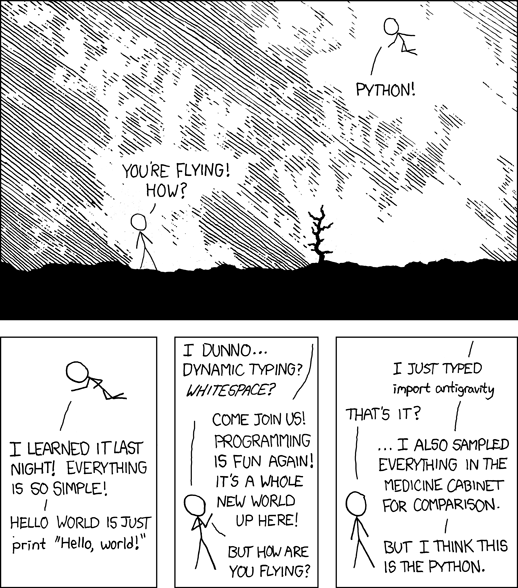

In [7]:
url1="https://imgs.xkcd.com/comics/python.png"
display(Image(url1, width=500, unconfined=True))

### Why Python?    
@ CGOHLKE 

So far we have shown that:

* Python built-in lists cannot efficiently store homogeneous numerical data.
* Python runs numerical code orders of magnitudes slower than compiled C.
* Python code cannot be run in parallel on multiple CPU cores in the same process.

Note that this applies to CPython, the Python reference implementation, only. Other Python implementations (pypy, Jython IronPython) might not have these limitations.

#### Why do we consider Python for big data image processing and analysis?

There are technical solutions to overcome those limitations:

* The **numpy library** provides a **standardized, efficient N-dimensional array object** to store homogeneous numerical data.

* A **large number of third party libraries** (numpy, scipy, scikit-image, etc.) provide fast implementations of numerical functions operating on numpy arrays.

* Python can be **extended using modules written in C**, which can release the GIL.

* Python code can be **type annotated and compiled to C code** using Cython.

* Python code can be **just in time compiled to LLVM, CUDA, or OpenCL** and executed on CPU or GPU, e.g. via numba.


Putting the limitations into perspective: besides CPU bound numerical calculations, there are many other tasks that are part of an efficient image processing pipeline:

* Many tasks are **I/O bound** (load or save data from/to the Internet, hard drive, or databases) and can be efficiently multi-threaded in Python.

* Besides threading, there are other **methods to analyze data in parallel**: SIMD, multiprocessing, distributed.

* Python can be used to **drive/control/schedule compile and compute tasks**, e.g. generate, compile, and execute C/OpenCL/CUDA code at runtime.


If you are not a programmer but an image analyst or end user of imaging software, Python can be used

* as a **glue language** for external libraries or executables written in C, Fortran, R, Java, .NET, Matlab, etc.

* for **data munging**, i.e. mapping image and meta-data from a diversity of formats (raw binary, html, CSV, TIFF, HDF5, etc.) and sources (file system, databases, http, ftp, cloud storage) into more convenient formats.

* as a **scripting language for imaging software** such as ZEN, μManager, CellProfiler, MeVisLab, ArcGIS, Amira, ParaView, VisIt, GIMP, Blender, OMERO, BisQue, etc.

datatypes 

In [8]:
# LIST

a=[70,'weight']
print('PRINT LIST')
for i in a:
    print(i,end=' ')

print('\nIndex from list')
print(a[0])

PRINT LIST
70 weight 
Index from list
70


In [9]:
# DICT

a={'weight':70}
print('READ DICTIONARY')
print (a['weight'])
print('Index from list')
for i in a.keys():
    print(a[i])

READ DICTIONARY
70
Index from list
70


In [10]:
# TUPLE

a=(70,'weight')

print('Index from tuple')
print(a[0])

Index from tuple
70


## 4) NUMPY

* wrapped C/C++/Fortran code
* ndarray and matrices(2D) 
* record arrays
* sort of RAM limited



++ Universal functions (ufunc)

++ Data type objects (dtype)

++ The N-dimensional array (ndarray)

+ Packaging (numpy.distutils)
+ Test Support (numpy.testing)
+ Random sampling (numpy.random)
+ Matrix library (numpy.matlib)
+ Linear algebra (numpy.linalg)
+ Discrete Fourier Transform (numpy.fft)
+ Mathematical functions with automatic domain (numpy.emath)
+ Optionally Scipy-accelerated routines (numpy.dual)
+ C-Types Foreign Function Interface (numpy.ctypeslib)

[numpy : list of functions](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html)

In [11]:
a = np.array([1, 2, 3])

In [12]:
a.dtype

dtype('int64')

In [13]:
a= np.ones(shape=(3, 4), dtype=np.int32)
a

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

In [14]:
a.mean()

1.0

## 5) SCIPY


In [15]:
import scipy

+ Special functions (scipy.special)
+ Integration (scipy.integrate)
+ Optimization (scipy.optimize)
+ Interpolation (scipy.interpolate)
+ Fourier Transforms (scipy.fftpack)
+ Signal Processing (scipy.signal)
+ Linear Algebra (scipy.linalg)
+ Sparse Eigenvalue Problems with ARPACK
+ Compressed Sparse Graph Routines (scipy.sparse.csgraph)
+ Spatial data structures and algorithms (scipy.spatial)
+ Statistics (scipy.stats)
+ Multidimensional image processing (scipy.ndimage)
+ File IO (scipy.io)
<br> <br>
+ Clustering package (scipy.cluster)
+ Constants (scipy.constants)
+ Discrete Fourier transforms (scipy.fftpack)
+ Integration and ODEs (scipy.integrate)
+ Interpolation (scipy.interpolate)
+ Input and output (scipy.io)
+ Linear algebra (scipy.linalg)
+ Miscellaneous routines (scipy.misc)
+ Multi-dimensional image processing (scipy.ndimage)
+ Orthogonal distance regression (scipy.odr)
+ Optimization and root finding (scipy.optimize)
+ Signal processing (scipy.signal)
+ Sparse matrices (scipy.sparse)
+ Sparse linear algebra (scipy.sparse.linalg)
+ Compressed Sparse Graph Routines (scipy.sparse.csgraph)
+ Spatial algorithms and data structures (scipy.spatial)
+ Special functions (scipy.special)
+ Statistical functions (scipy.stats)
+ Statistical functions for masked arrays (scipy.stats.mstats)
+ Low-level callback functions

In [16]:
try:
    url1=os.path.join(r'C:\Users\Jenu Chacko\Documents\_____Q_coding\coding_club_notebook','scipy_dist.jpg')
    display(Image(url1, width=500, unconfined=True))
except: 
    pass

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

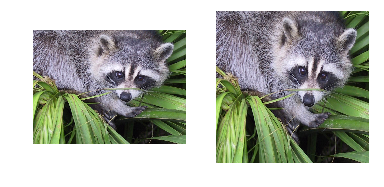

In [17]:
import scipy.misc
face=scipy.misc.face()

subplot(121)
imshow(face)
axis('off');

xfactor=3
yfactor=4
resized_face = face.repeat(yfactor, axis=0).repeat(xfactor, axis=1)

subplot(122)
imshow(resized_face)
axis('off');

In [18]:
face.shape

(768, 1024, 3)

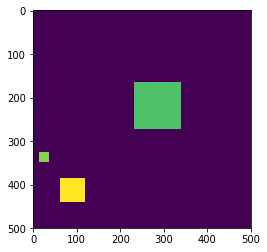

In [19]:
# @Author:Ivan Idris

N=500
img = numpy.zeros((N, N),numpy.uint8)
NSQUARES=3
centers = numpy.random.randint(0, N, size=(NSQUARES, 2))
radii = numpy.random.randint(0, N/9, size=NSQUARES)
colors = numpy.random.randint(100, 255, size=NSQUARES)


for i in range(NSQUARES):
    xindices = range(centers[i][0] - radii[i], centers[i][0] +    radii[i])
    xindices = numpy.clip(xindices, 0, N - 1)
    yindices = range(centers[i][1] - radii[i], centers[i][1] +    radii[i])
    yindices = numpy.clip(yindices, 0, N - 1)
    
    if len(xindices) == 0 or len(yindices) == 0:
        continue
    coordinates = numpy.meshgrid(xindices, yindices)
    img[coordinates] = colors[i]

imshow(img)


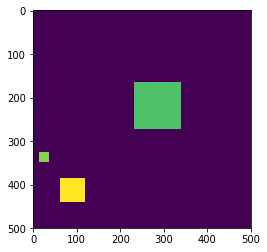

In [20]:
## MEMORY MAPPING

img.tofile('rs3.raw')
img_memmap = numpy.memmap('rs3.raw', shape=img.shape)
imshow(img_memmap)

In [21]:
import scipy.signal

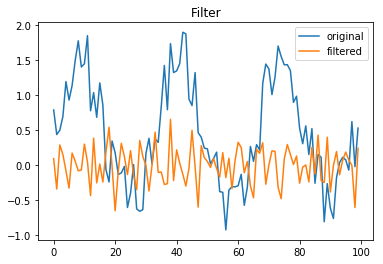

In [22]:
data= np.random.rand(100)+np.sin(np.linspace(0,2*pi*3,100))

b,a = scipy.signal.iirdesign (wp=0.2, ws=0.1, gstop=60, gpass=1, ftype='butter')
filtered = scipy.signal.lfilter(b, a, data)

plot(data,label='original')
plot(filtered,label='filtered')
legend()
title('Filter');

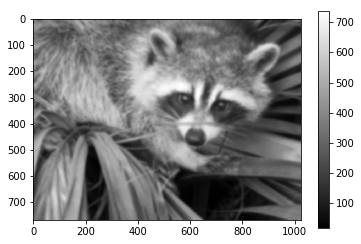

In [23]:
face=scipy.misc.face()
face=face.sum(2)
face=scipy.ndimage.gaussian_filter(face,4)
imshow(face,cmap='gray')
colorbar()

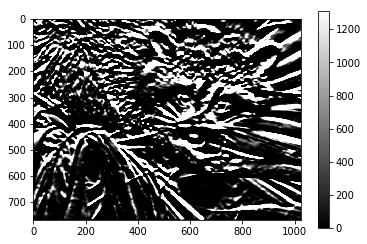

In [24]:
sobelx = scipy.ndimage.sobel(face)
sobely = scipy.ndimage.sobel(face,0)
face_sobel=sobely*sobely
imshow(face_sobel,vmax=face_sobel.mean(),cmap='gray')
colorbar()

+ [QUICK REFERENCE OF SCIPY FUNCTIONS](http://www.davekuhlman.org/scipy_guide_01.html)
+ [LEARN SCIPY BY APPLYING- USE ON BINDER](https://github.com/elegant-scipy/notebooks/tree/master/notebooks)

#### FOR A MATLAB AFFECTIONADO! 

In [25]:
import scipy.io
#data = scipy.io.loadmat('some-matlabfile.mat')

+ [scipy for MATLAB users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html)
+ [Numerical Analysis & Validation](http://hyperpolyglot.org/numerical-analysis)

#### USE STATISTICS

In [26]:
import scipy.stats
scipy.stats.scoreatpercentile(np.random.randint(0,100,size=10000), 50)

50.0

In [27]:
try:
    url1=os.path.join(r'C:\Users\Jenu Chacko\Documents\_____Q_coding\coding_club_notebook','meme1.jpg')
    display(Image(url1, width=300, unconfined=True))
except: pass

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

## 6) SCIKIT LEARN

> SKLEARN IS ONE OF THE [scikit packages](https://scikits.appspot.com/scikits).
> ### SK LEARN
>1. Supervised learning
>> 1.1. Generalized Linear Models
1.2. Linear and Quadratic Discriminant Analysis
1.3. Kernel ridge regression
1.4. Support Vector Machines
1.5. Stochastic Gradient Descent
1.6. Nearest Neighbors
1.7. Gaussian Processes
1.8. Cross decomposition
1.9. Naive Bayes
1.10. Decision Trees
1.11. Ensemble methods
1.12. Multiclass and multilabel algorithms
1.13. Feature selection
1.14. Semi-Supervised
1.15. Isotonic regression
1.16. Probability calibration
1.17. Neural network models (supervised)
>>2. Unsupervised learning
2.1. Gaussian mixture models
2.2. Manifold learning
2.3. Clustering
2.4. Biclustering
2.5. Decomposing signals in components (matrix factorization problems)
2.6. Covariance estimation
2.7. Novelty and Outlier Detection
2.8. Density Estimation
2.9. Neural network models (unsupervised)
3. Model selection and evaluation
>>3.1. Cross-validation: evaluating estimator performance
3.2. Tuning the hyper-parameters of an estimator
3.3. Model evaluation: quantifying the quality of predictions
3.4. Model persistence
3.5. Validation curves: plotting scores to evaluate models
4. Dataset transformations
>>4.1. Pipeline and FeatureUnion: combining estimators
4.2. Feature extraction
4.3. Preprocessing data
4.4. Unsupervised dimensionality reduction
4.5. Random Projection
4.6. Kernel Approximation
4.7. Pairwise metrics, Affinities and Kernels
4.8. Transforming the prediction target (y)


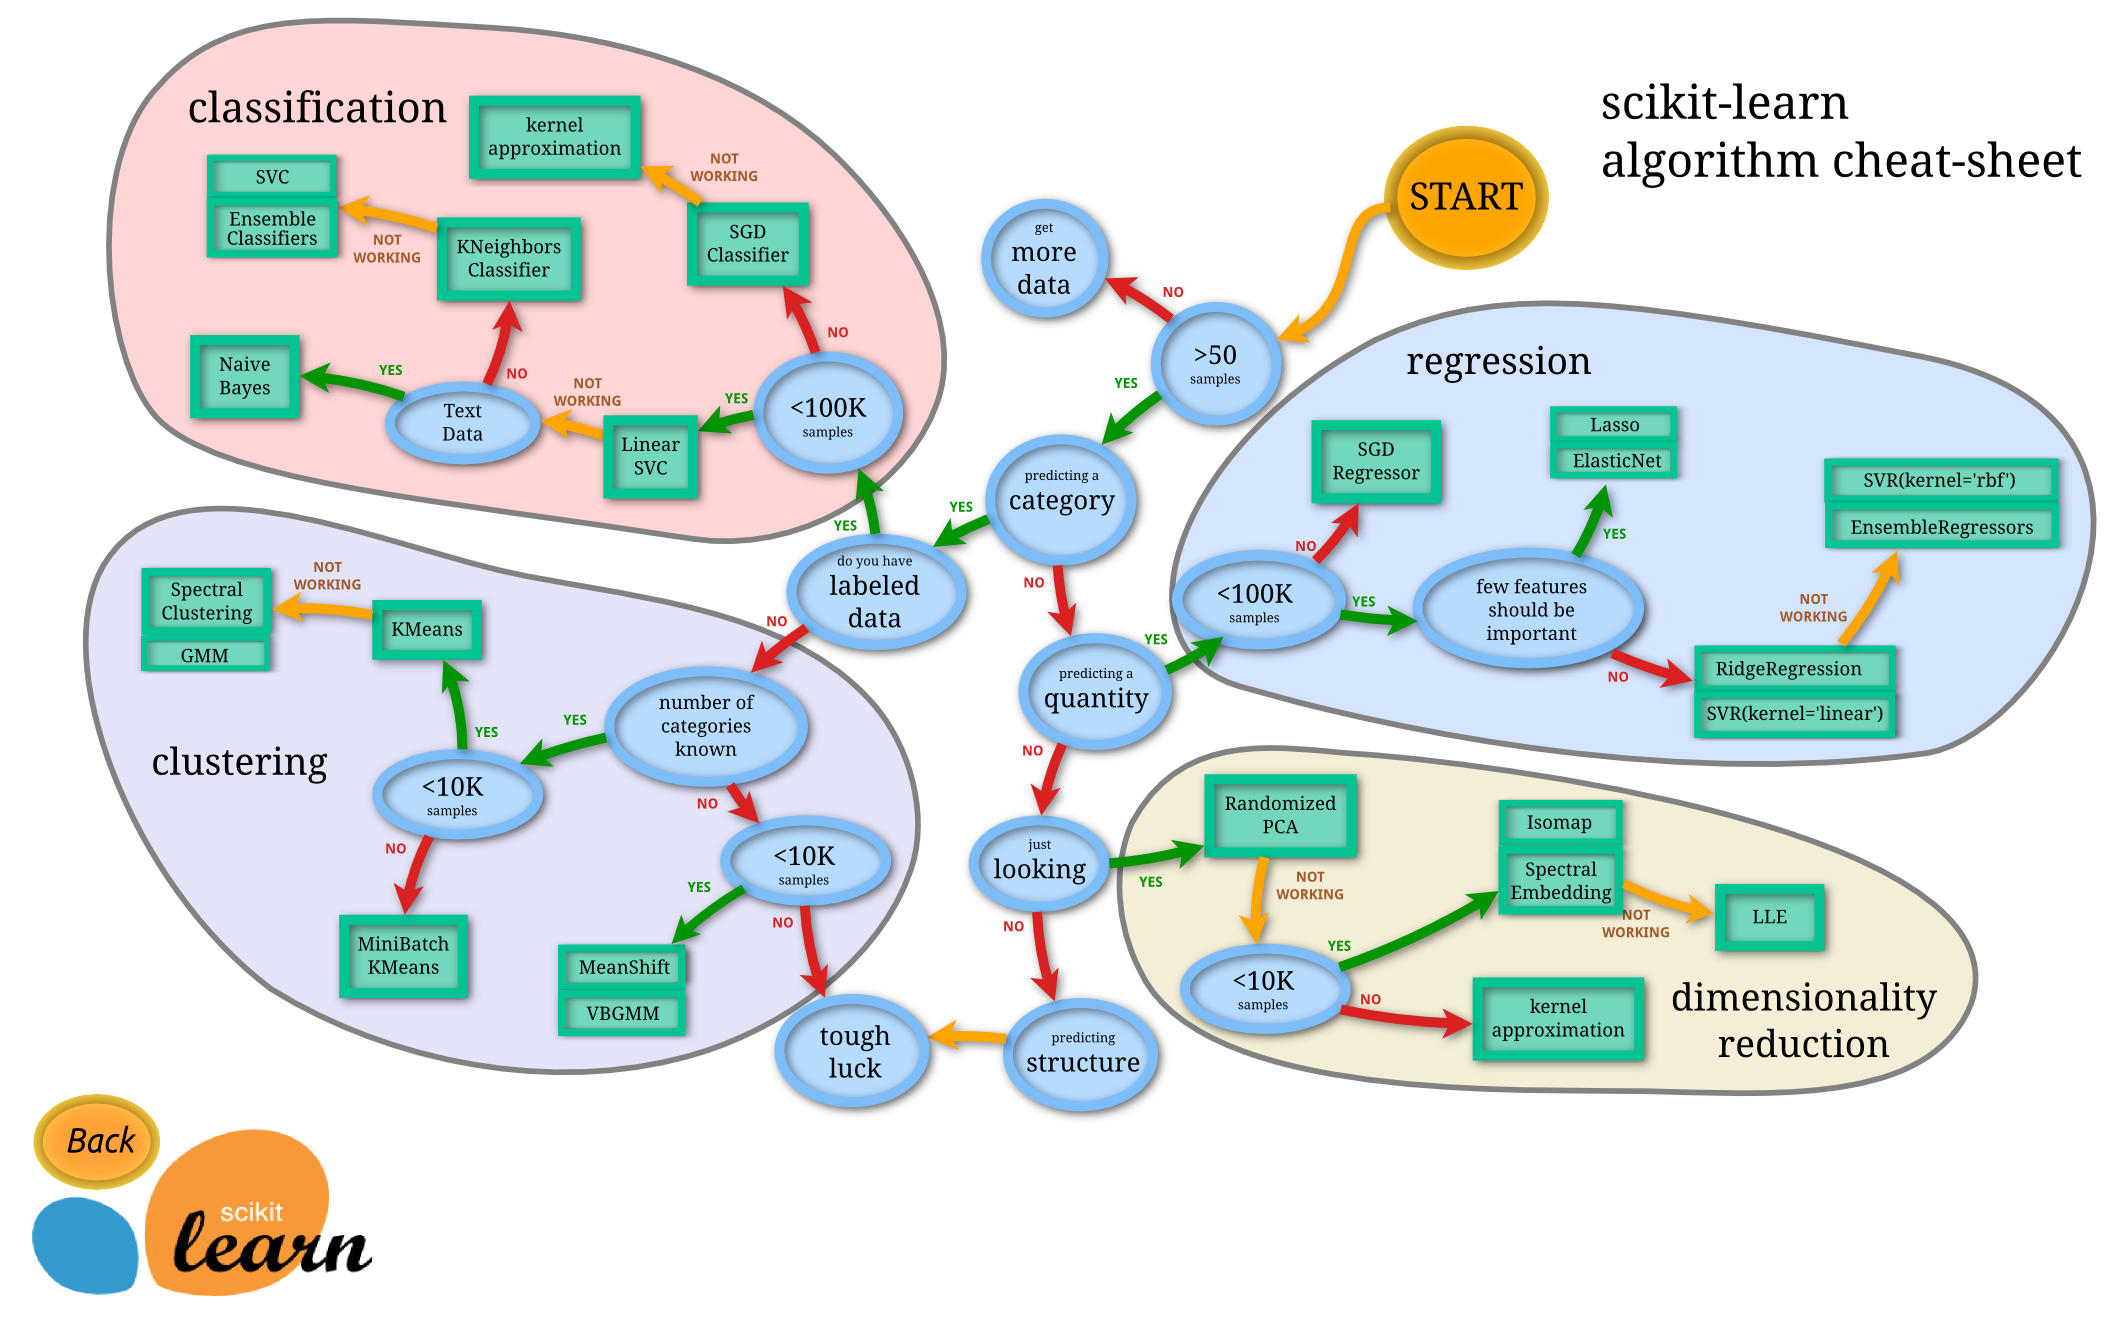

In [28]:
url3='http://scikit-learn.org/stable/_static/ml_map.png'
display(Image(url3, width=900, unconfined=True))

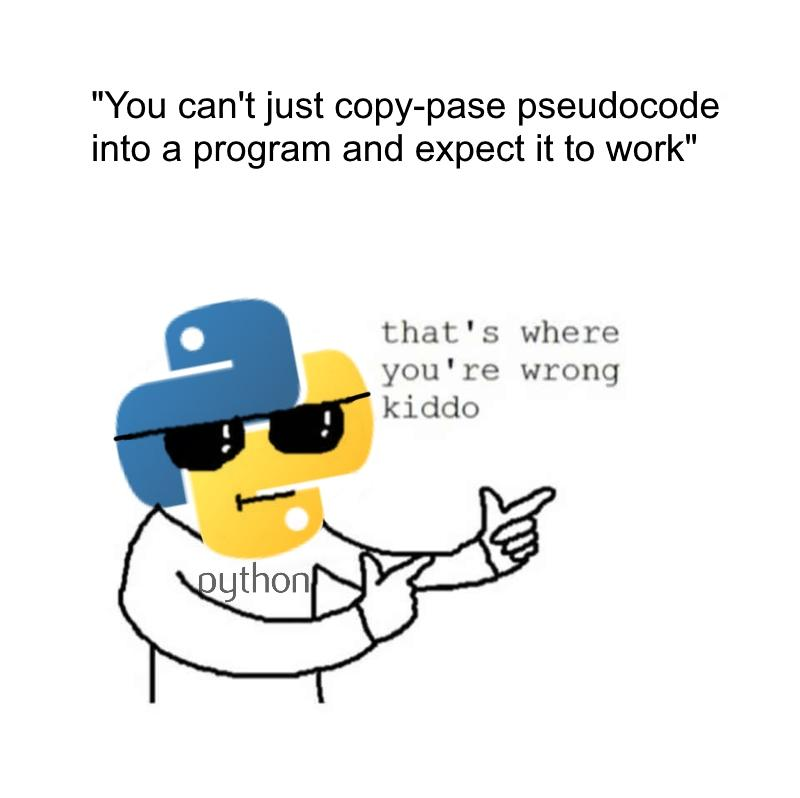

In [29]:
url6=r'https://i.imgur.com/yva3gaG.jpg'
display(Image(url6, width=400, unconfined=True))

#### [DIGIT DATASET](http://yann.lecun.com/exdb/mnist/)


In [30]:
from sklearn import datasets
digits = datasets.load_digits()

In [31]:
print(digits.data.shape)
print(digits.target)

(1797, 64)
[0 1 2 ... 8 9 8]


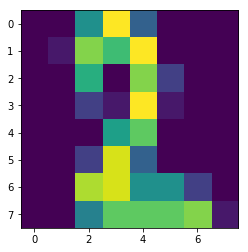

In [32]:
imshow(digits.images[22])

In [33]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0,7,'6')

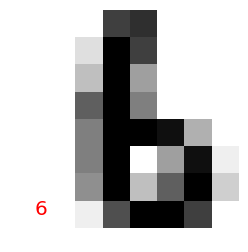

In [34]:
ix= np.random.randint(0,len(digits.data))
imshow(digits.images[ix],interpolation='nearest',cmap='gray_r')
axis('off')
clf.predict(digits.data[ix].reshape(1,-1))
text(0, 7, str(digits.target[ix]),size=20,color='red')

#### [IRIS DATASET](https://archive.ics.uci.edu/ml/datasets/iris)

- Features in the Iris dataset:
  + sepal length in cm
  + sepal width in cm
  + petal length in cm
  + petal width in cm

- Target classes to predict:
  + Iris Setosa
  + Iris Versicolour
  + Iris Virginica

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [36]:
n_samples, n_features = iris.data.shape
for i in (zip(iris.feature_names,iris.data[0])):
    print (i[0],'\t',i[1])

sepal length (cm) 	 5.1
sepal width (cm) 	 3.5
petal length (cm) 	 1.4
petal width (cm) 	 0.2


In [37]:
from sklearn.decomposition import PCA

In [38]:
X_reduced = PCA(n_components=3).fit_transform(iris.data)
print (len(iris.data),'x',iris.data[0].shape[0],'became',X_reduced.shape)

y = iris.target

150 x 4 became (150, 3)


/usr/local/miniconda3/envs/coding-club/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


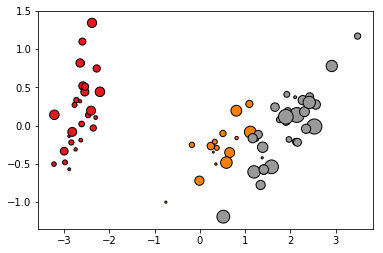

In [39]:
scatter(X_reduced[:, 0], X_reduced[:, 1], s=X_reduced[:, 2]*300, c=y,
           cmap=plt.cm.Set1, edgecolor='k')

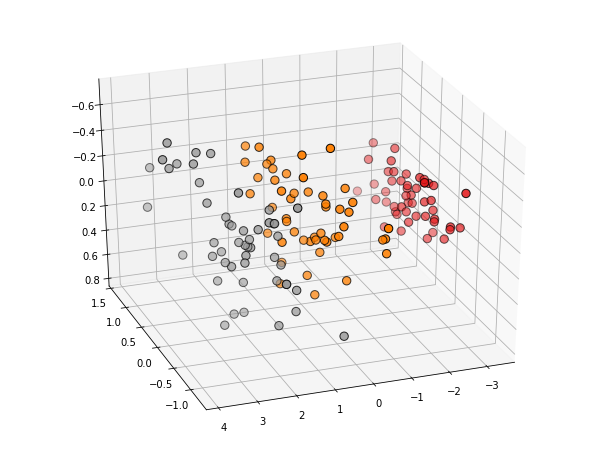

In [40]:
from mpl_toolkits.mplot3d import Axes3D
h1 = figure(1, figsize=(8, 6))
ax = Axes3D(h1, elev=-150, azim=110)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k',s=70)

#### KMEANS **Classification**:

In [41]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

print(iris.target_names[knn.predict([[3, 5, 4, 2]])])


['virginica']


#### LINEAR REG

(100, 1) (100,)
[0.09521334]


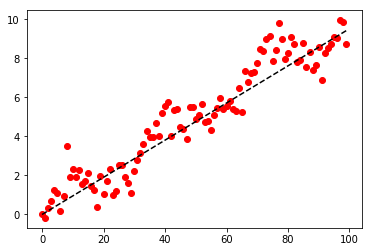

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

sz=100
data= np.random.randn(sz)/1.5+np.sin(np.linspace(0,2*pi*3,sz))
data=np.linspace(0,10,num=sz)+data
plot(data,'or')

x=np.arange(sz)
X = x[:, np.newaxis]
print (X.shape,data.shape)
model.fit(X, data) 
print (model.coef_)
plot(x,model.coef_[0]*X,'--k')

IF VERSIONS ARE GIVING YOU TROUBLE IN SEEING OUTPUT

In [43]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

#### LEARN ABOUT ML 
+ [COGGLE](https://static.coggle.it/diagram/WHeBqDIrJRk-kDDY/t/categories-of-algorithms-non-exhaustive?from=timeline&isappinstalled=0)
+ [ML too simple? TRY NEURAL NETWORKS](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463)

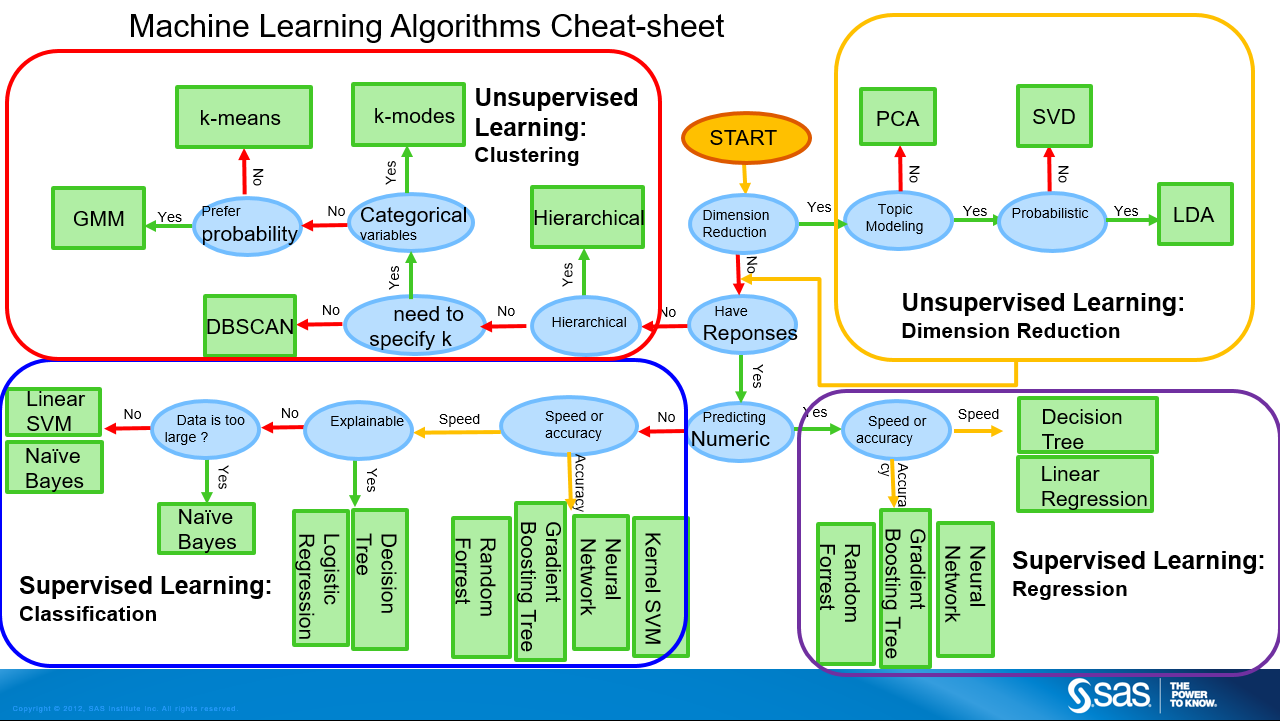

In [44]:
url4=r'https://feisky.xyz/machine-learning/appendix/CheatSheet.png'
display(Image(url4, width=900, unconfined=True))

> TITANIC DATASET FROM KAGGLE (IF YOU WANT TO TRY MORE)
+ [test_data](https://www.kaggle.com/c/3136/download/test.csv)<br>
+ [train_data](https://www.kaggle.com/c/3136/download/train.csv)

## 7) Python - C

In [45]:
import sys

size = 8192
array = [random.random() for _ in range(size)]

print("Storage size of Python list: %i bytes" % (
        sys.getsizeof(array) + sys.getsizeof(array[0]) * size))

print("Storage size of C array:     %i bytes" % (8 + size * 8))

Storage size of Python list: 265768 bytes
Storage size of C array:     65544 bytes


### 7.1 NUMBA

In [46]:
import numba
@numba.jit(nogil=True)
def myltiply_by_2(x):
    """Return the dot product of two sequences in range."""
    return(2.0*x)

### 7.2 CYTHON

In [47]:
import cython 

In [48]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [49]:
%%cython
def myltiply_by_2(float x):
    return 2.0 * x

print myltiply_by_2(23.)


Error compiling Cython file:
------------------------------------------------------------
...
def myltiply_by_2(float x):
    return 2.0 * x

print myltiply_by_2(23.)
     ^
------------------------------------------------------------

/Users/curtis/.ipython/cython/_cython_magic_d94ce424e9d4ffa9cf91d60a542a6302.pyx:4:6: Syntax error in simple statement list


TypeError: object of type 'NoneType' has no len()

In [50]:
def myltiply_by_2(x)->float:  # just convention not an assertion! 
    return 2.0 * x

print (myltiply_by_2(23.))

46.0


In [51]:
%%cython --compile-args=-O2 --compile-args=/openmp --link-args=-fopenmp

# with gcc use `--compile-args=-fopenmp`
# with msvc use `--compile-args=/openmp`

#cython: boundscheck=False
#cython: wraparound=False
#cython: cdivision=True


CompileError: command 'gcc' failed with exit status 1

### 7.3 FORTRAN

In [52]:
#!pip install fortran-magic

In [53]:
import fortran-magic

SyntaxError: invalid syntax (<ipython-input-53-9f8b65d93767>, line 1)

In [54]:
%load_ext fortranmagic

ModuleNotFoundError: No module named 'fortranmagic'

In [55]:
%%fortran
subroutine compute_fortran(x, y, z)
    real, intent(in) :: x(:), y(:)
    real, intent(out) :: z(size(x, 1))

    z = sin(x + y)

end subroutine compute_fortran

compute_fortran([1, 2, 3], [4, 5, 6])

UsageError: Cell magic `%%fortran` not found.


### 7.4 ImageJ

#### AUTHOR @C_GOHLKE

[ImageJ hyperstacks](https://imagej.nih.gov/ij/docs/guide/146-8.html#fig:Stacks-and-Hyperstacks) are non-conformant TIFF files that store one up to 6-dimensional image in TZCYXS axis order in one contiguous strip. 

The contiguous image data in the ImageJ hyperstack file can be **[memory-mapped](https://en.wikipedia.org/wiki/Memory-mapped_file)** to a numpy array, which has significant advantages over accessing thousands of individual files:

1. no overhead parsing individual TIFF files.

2. **increased I/O performance** because of operating system optimizations.

3. Numpy can access small segments of the data on disk **without reading the entire file into main memory**. We can operate on a big memory-mapped numpy array in the same way as on an array in memory.

Let's save the largest selected region from the first 20,000 images of the time series to an ImageJ hyperstack file, which might take a while: 

In [56]:
* threads speedup 			 1 			2 
+ correlate_numpy 		 	39.37 		0.6
+ correlate_scipy 		 	1.38 		1.0
+ correlate_cython			251.83		1.9
+ correlate_cython_open MP	81.94		0.9
+ correlate_fft	    		0.54		0.8
+ correlate_cython_fft2d	0.34		0.7

SyntaxError: invalid syntax (<ipython-input-56-f7132d967b2d>, line 1)

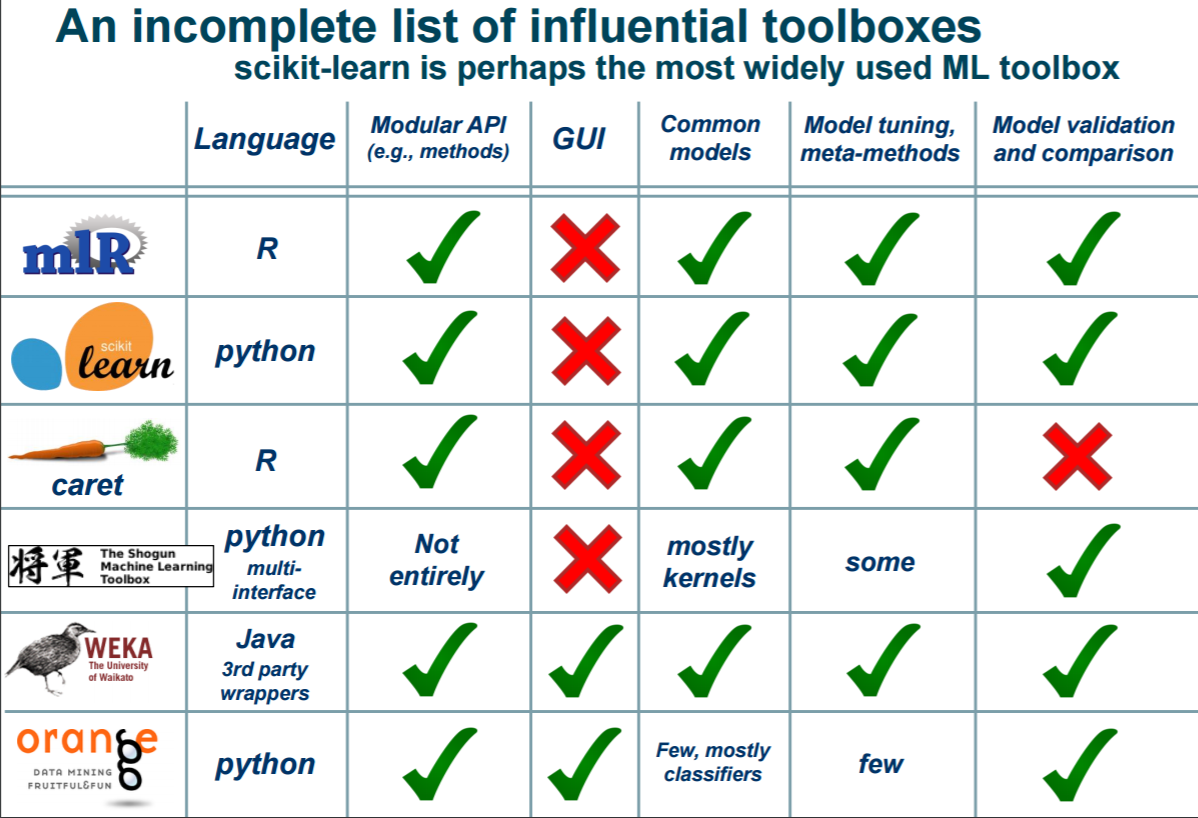

In [57]:
## TOOL KIT COMPARISON
url5=r'https://3s81si1s5ygj3mzby34dq6qf-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/turing4.png'
display(Image(url5, width=700, unconfined=True))

In [58]:
try:
    url1=os.path.join(r'C:\Users\Jenu Chacko\Documents\_____Q_coding\coding_club_notebook','meme2.jpg')
    display(Image(url1, width=600, unconfined=True))
except:
    pass

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>